In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
life = pd.read_csv("life_exp.csv")
life

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Country,Diet_Type,Government_Health_Policy
0,0,72.483571,17.923146,4.357787,71.654576,74294.715447,Country B,Vegetarian,1.0
1,1,69.308678,22.896773,4.560785,68.748497,73109.928448,Country B,Non-Vegetarian,1.0
2,2,73.238443,23.286427,5.083051,73.985736,78248.930090,Country C,Vegetarian,1.0
3,3,77.615149,20.988614,5.053802,78.225520,82709.110470,Country C,Vegan,1.0
4,4,68.829233,24.193571,2.622331,68.808332,72929.102183,Country A,Vegetarian,1.0
...,...,...,...,...,...,...,...,...,...
95,95,62.682425,26.926587,3.307090,62.213250,68760.245347,Country C,Non-Vegetarian,1.0
96,96,71.480601,20.580713,4.899600,69.767467,74406.109077,Country A,Non-Vegetarian,1.0
97,97,71.305276,25.768626,4.307300,72.659149,75924.599005,Country B,Non-Vegetarian,1.0
98,98,70.025567,25.291044,4.812862,69.911027,73274.330776,Country C,Non-Vegetarian,1.0


In [3]:
life.describe()

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Government_Health_Policy
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,49.500000,69.480767,25.111523,4.064896,69.587608,74368.758472,1.0
std,29.011492,4.540842,4.768345,1.084283,4.475948,4744.899489,0.0
min,0.000000,56.901274,15.406144,0.758733,59.054457,62441.446464,1.0
25%,24.750000,66.995472,20.971697,3.344556,66.820378,70968.995974,1.0
50%,49.500000,69.365219,25.420536,4.097696,69.626849,74399.904642,1.0
75%,74.250000,72.029760,27.690852,4.704437,72.651242,78126.987900,1.0
max,99.000000,79.261391,38.600846,7.852731,79.173729,86449.739694,1.0


In [8]:
life_country = life.groupby(['Country']).size()
life_country

Country
Country A    29
Country B    38
Country C    33
dtype: int64

In [14]:
life_diet = life.groupby(['Diet_Type']).size()
life_diet

Diet_Type
Non-Vegetarian    30
Vegan             36
Vegetarian        34
dtype: int64

In [34]:
life_country_df = life.groupby(['Diet_Type', 'Country']).size()
life_country_df

Diet_Type       Country  
Non-Vegetarian  Country A     7
                Country B    11
                Country C    12
Vegan           Country A    13
                Country B    11
                Country C    12
Vegetarian      Country A     9
                Country B    16
                Country C     9
dtype: int64

In [24]:
life.corr(numeric_only=True)

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Government_Health_Policy
Unnamed: 0,1.000000,0.044508,0.006198,-0.089520,0.043373,0.029239,NaN
Life_Expectancy,0.044508,1.000000,-0.136422,0.190840,0.980875,0.895932,NaN
Average_Temperature,0.006198,-0.136422,1.000000,-0.036632,-0.141879,-0.045018,NaN
Daily_Screen_Time,-0.089520,0.190840,-0.036632,1.000000,0.193556,0.135069,NaN
Health_Index,0.043373,0.980875,-0.141879,0.193556,1.000000,0.895719,NaN
Income,0.029239,0.895932,-0.045018,0.135069,0.895719,1.000000,NaN
Government_Health_Policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


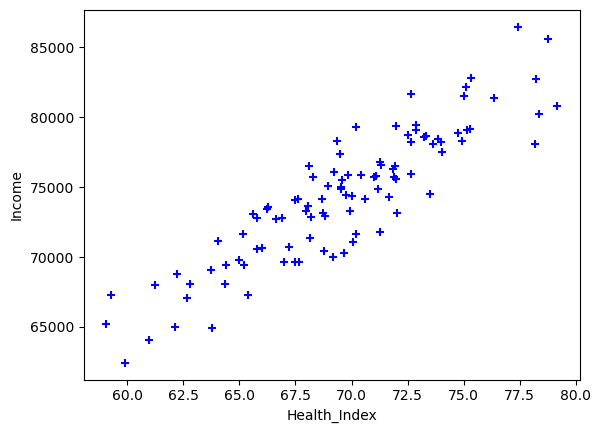

In [25]:
plt.xlabel('Health_Index')
plt.ylabel('Income')
plt.scatter(life.Health_Index, life.Income, color='blue', marker='+')

In [28]:
life_country_df_min = life.groupby(['Diet_Type', 'Country']).min()
life_country_df_min

Unnamed: 0  Life_Expectancy  Average_Temperature  \
Diet_Type      Country                                                       
Non-Vegetarian Country A           6        56.901274            20.580713   
               Country B           1        60.201649            22.896773   
               Country C          14        61.375411            17.990745   
Vegan          Country A           8        60.062155            17.425764   
               Country B          12        60.433599            17.246683   
               Country C           3        64.468325            16.962584   
Vegetarian     Country A           4        66.615390            20.714212   
               Country B           0        64.711445            15.406144   
               Country C           2        68.074589            19.645538   

                          Daily_Screen_Time  Health_Index        Income  \
Diet_Type      Country                                                    
Non-Vegetarian Country A           3.018491     59.054457  65191.209907   
               Country B           2.569859     59.880264  62441.446464   
               Country C           2.047912     62.213250  64952.304877   
Vegan          Country A           2.975612     59.253857  67301.305250   
               Country B           1.974857     60.971352  64066.372179   
               Country C           0.758733     64.359565  68068.874114   
Vegetarian     Country A           2.622331     67.473050  69643.937906   
               Country B           3.062175     64.034284  69444.830495   
               Country C           3.747432     69.340424  74142.232221   

                          Government_Health_Policy  
Diet_Type      Country                              
Non-Vegetarian Country A                       1.0  
               Country B                       1.0  
               Country C                       1.0  
Vegan          Country A                       1.0  
               Country B                       1.0  
               Country C                       1.0  
Vegetarian     Country A                       1.0  
               Country B                       1.0  
               Country C                       1.0

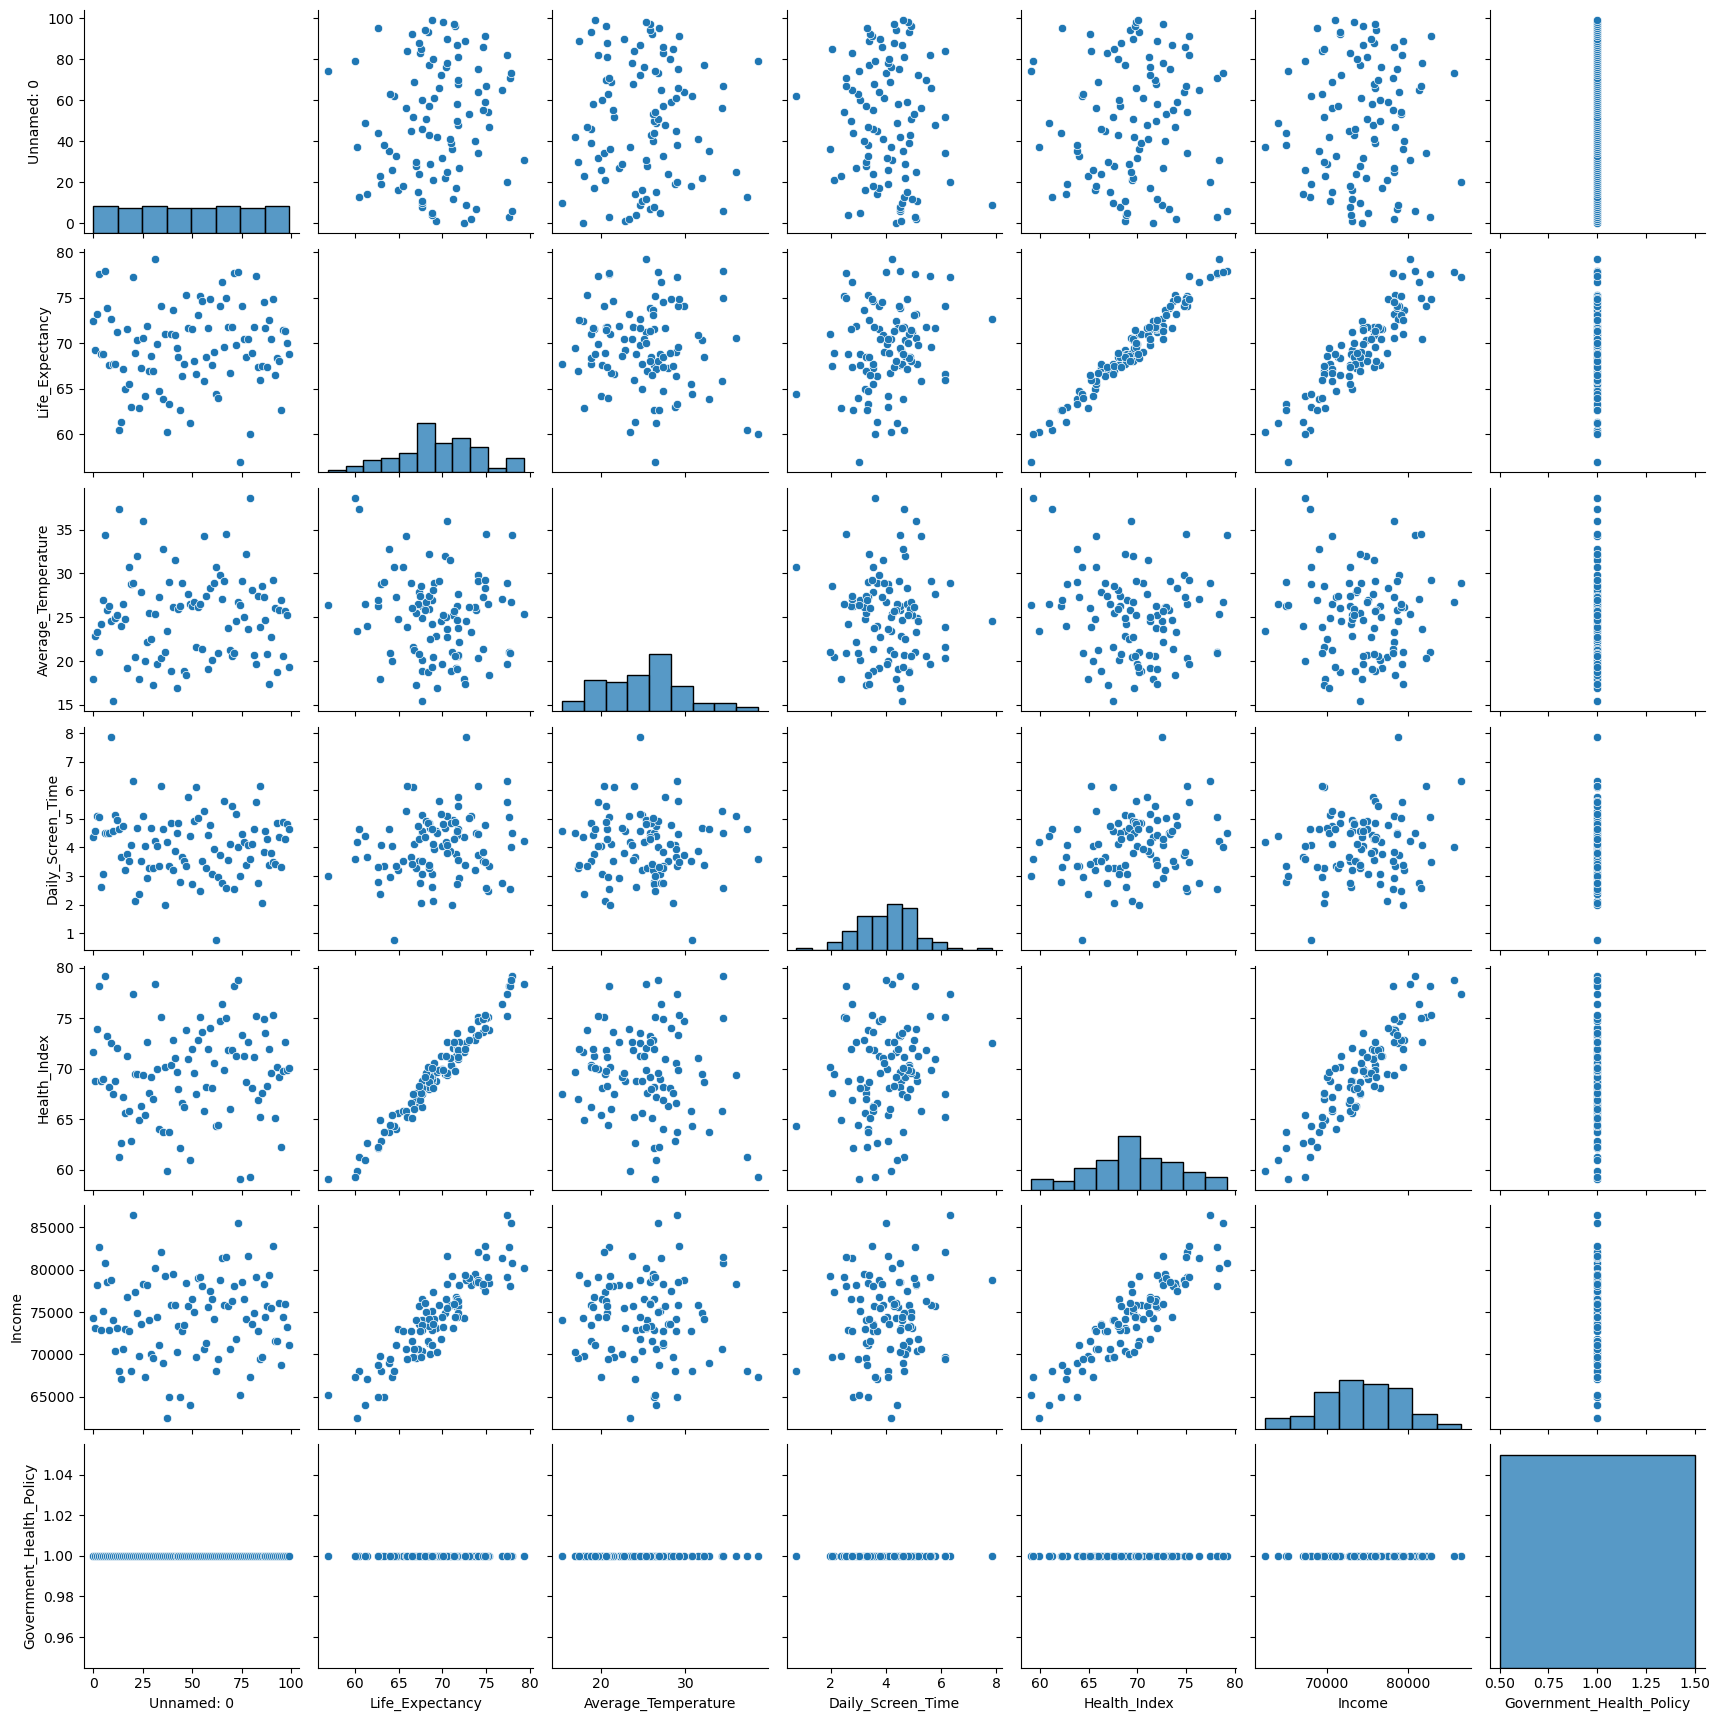

In [39]:
sns.pairplot(life)

<Axes: xlabel='Country'>

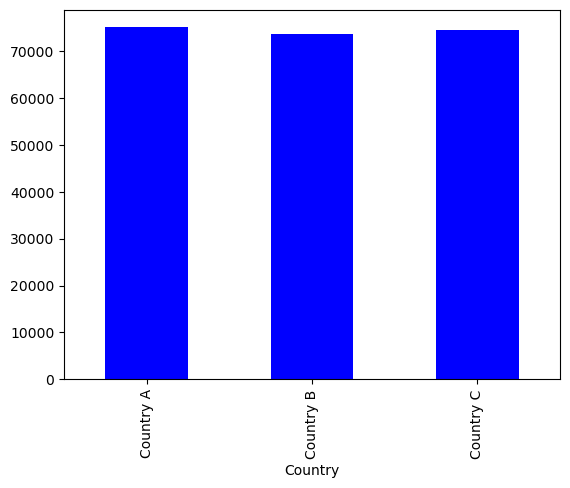

In [41]:
life_country = life.groupby ("Country")
avg_inc_country =life_country ["Income"].mean()
avg_inc_country.plot(kind='bar', color='blue')

In [44]:
life_country_df_1 = life.groupby(['Diet_Type', 'Income']).size()
life_country_df_1

Diet_Type       Income      
Non-Vegetarian  62441.446464    1
                64952.304877    1
                64998.451047    1
                65191.209907    1
                67040.038861    1
                               ..
Vegetarian      79176.577583    1
                80182.926567    1
                81616.565500    1
                82117.438665    1
                86449.739694    1
Length: 100, dtype: int64

In [50]:
life_mean = life.groupby (['Country', 'Diet_Type'])
life_mean["Life_Expectancy"].mean()

Country    Diet_Type     
Country A  Non-Vegetarian    70.471262
           Vegan             69.242026
           Vegetarian        70.414555
Country B  Non-Vegetarian    68.942830
           Vegan             68.623591
           Vegetarian        69.120235
Country C  Non-Vegetarian    67.402317
           Vegan             69.500399
           Vegetarian        73.212622
Name: Life_Expectancy, dtype: float64

In [51]:
life_min = life.groupby (['Country', 'Diet_Type'])
life_min["Life_Expectancy"].min()

Country    Diet_Type     
Country A  Non-Vegetarian    56.901274
           Vegan             60.062155
           Vegetarian        66.615390
Country B  Non-Vegetarian    60.201649
           Vegan             60.433599
           Vegetarian        64.711445
Country C  Non-Vegetarian    61.375411
           Vegan             64.468325
           Vegetarian        68.074589
Name: Life_Expectancy, dtype: float64

In [52]:
life_max = life.groupby (['Country', 'Diet_Type'])
life_max["Life_Expectancy"].max()

Country    Diet_Type     
Country A  Non-Vegetarian    77.896064
           Vegan             75.285611
           Vegetarian        74.877726
Country B  Non-Vegetarian    77.823218
           Vegan             74.843225
           Vegetarian        74.112725
Country C  Non-Vegetarian    77.690183
           Vegan             77.615149
           Vegetarian        79.261391
Name: Life_Expectancy, dtype: float64

In [56]:
life.corr(numeric_only=True)

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Government_Health_Policy
Unnamed: 0,1.000000,0.044508,0.006198,-0.089520,0.043373,0.029239,NaN
Life_Expectancy,0.044508,1.000000,-0.136422,0.190840,0.980875,0.895932,NaN
Average_Temperature,0.006198,-0.136422,1.000000,-0.036632,-0.141879,-0.045018,NaN
Daily_Screen_Time,-0.089520,0.190840,-0.036632,1.000000,0.193556,0.135069,NaN
Health_Index,0.043373,0.980875,-0.141879,0.193556,1.000000,0.895719,NaN
Income,0.029239,0.895932,-0.045018,0.135069,0.895719,1.000000,NaN
Government_Health_Policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


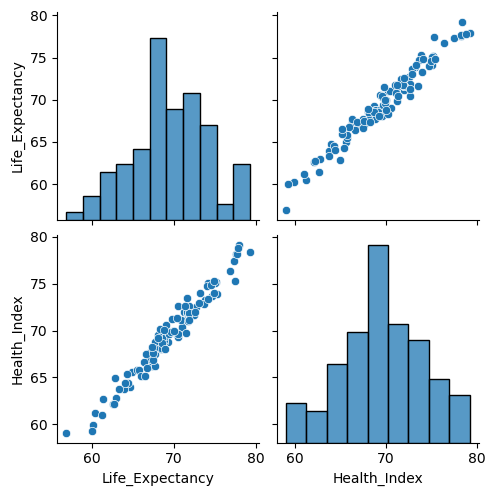

In [59]:

sns.pairplot(life[["Life_Expectancy", "Health_Index"]])

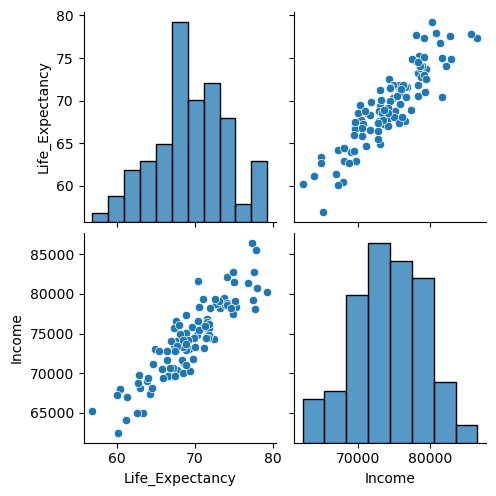

In [60]:
sns.pairplot(life[["Life_Expectancy", "Income"]])

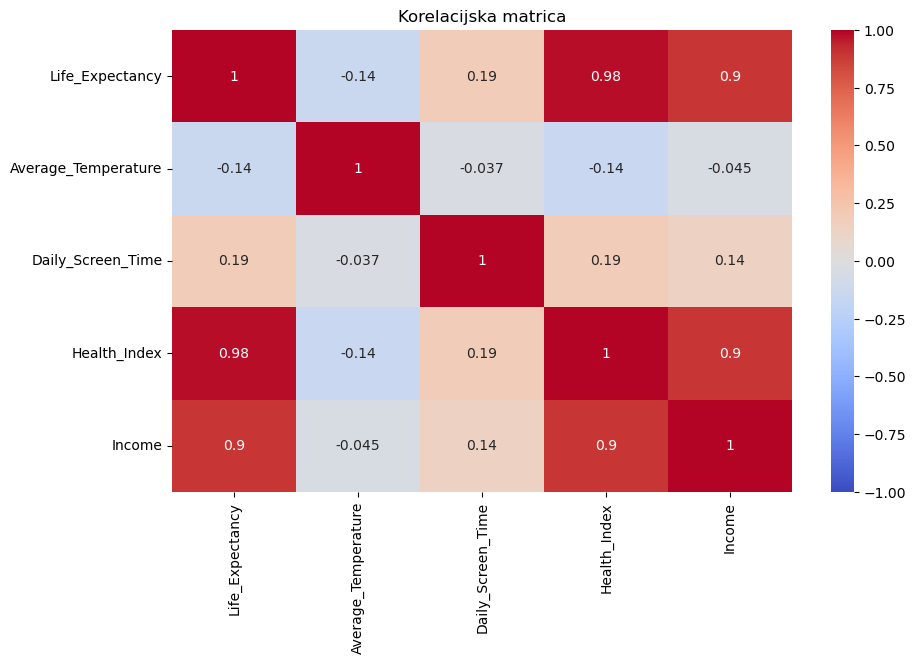

In [71]:
plt.figure(figsize=(10, 6))
numeric_cols = ['Life_Expectancy', 'Average_Temperature', 'Daily_Screen_Time', 'Health_Index', 'Income']
sns.heatmap(life[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelacijska matrica')
plt.show()

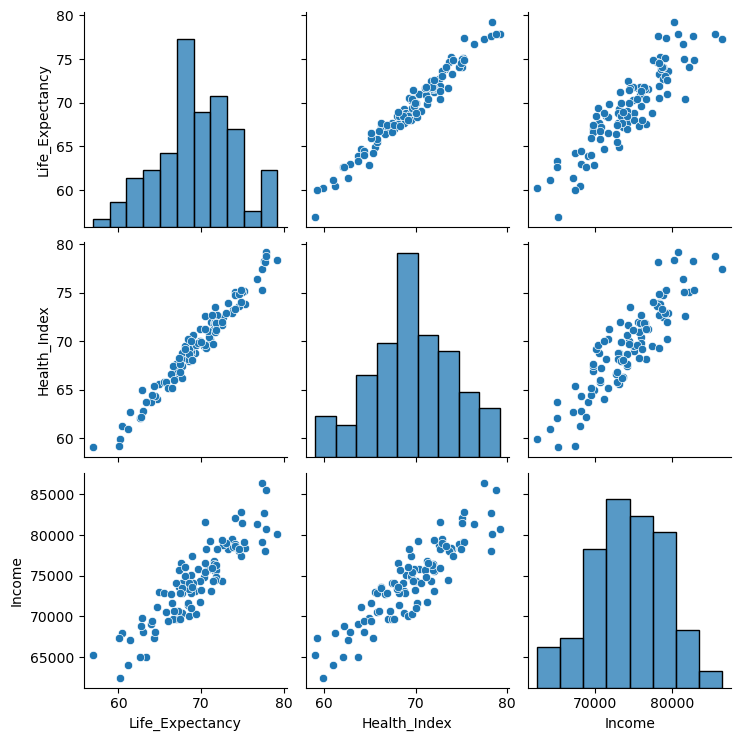

In [62]:
sns.pairplot(life[["Life_Expectancy", "Health_Index", "Income"]])

In [63]:
life_max = life.groupby (['Country', 'Diet_Type'])
life_max["Life_Expectancy"].max()

Country    Diet_Type     
Country A  Non-Vegetarian    77.896064
           Vegan             75.285611
           Vegetarian        74.877726
Country B  Non-Vegetarian    77.823218
           Vegan             74.843225
           Vegetarian        74.112725
Country C  Non-Vegetarian    77.690183
           Vegan             77.615149
           Vegetarian        79.261391
Name: Life_Expectancy, dtype: float64

<Axes: xlabel='Life_Expectancy', ylabel='Diet_Type'>

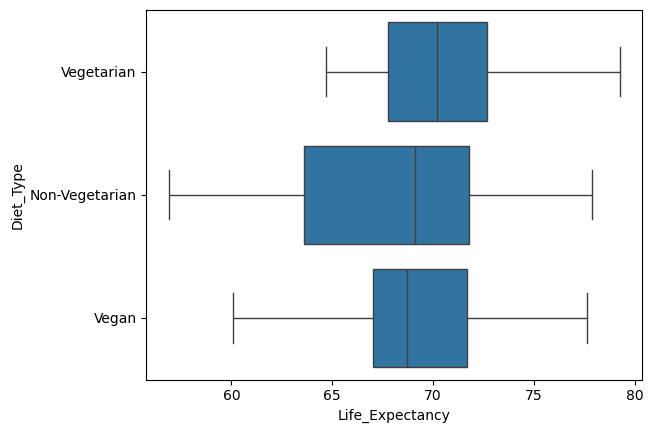

In [69]:
sns.boxplot (x = "Life_Expectancy", y = "Diet_Type", data=life)